In [1]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# get the output for all commands
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

tar: IT_PAGER=cat: Couldn't visit directory: No such file or directory
tar: Error exit delayed from previous errors.


In [2]:
df = pd.read_csv(r"C:\Users\palla\OneDrive\Documents\demo_data\2.concerticcir1.csv",header=None)

In [4]:
df.head()

,0,1,2
0,-0.382891,-0.090840,1.0
1,-0.020962,-0.477874,1.0
2,-0.396116,-1.289427,0.0
3,-0.618130,-0.063837,1.0
4,0.703478,-0.187038,1.0


In [5]:
df.shape

(100, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


<AxesSubplot:xlabel='0', ylabel='1'>

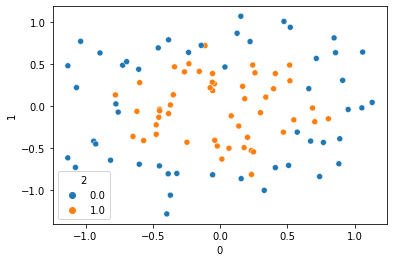

In [7]:
sns.scatterplot(x=0,y=1,hue=2,data=df)

## split the data into train and test

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df[[0,1]],df[2],test_size=0.2)

In [4]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [5]:
# standardization
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_trans = std.fit_transform(X_train)
X_test_trans = std.transform(X_test)

## build the neural networks

In [8]:
model = Sequential()
model.add(Dense(5,activation='relu',input_dim=2))

model.add(Dense(4,activation='relu'))

model.add(Dense(3,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 4)                 24        
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


In [10]:
# complie model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(X_train,y_train,batch_size=50,epochs=500,validation_split=0.2)

C:\Users\palla\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/500
2/2 [==============================] - 1s 248ms/step - loss: 0.6809 - accuracy: 0.4688 - val_loss: 0.7052 - val_accuracy: 0.3125
Epoch 2/500
2/2 [==============================] - 0s 41ms/step - loss: 0.6800 - accuracy: 0.4688 - val_loss: 0.7037 - val_accuracy: 0.3125
Epoch 3/500
2/2 [==============================] - 0s 49ms/step - loss: 0.6792 - accuracy: 0.4688 - val_loss: 0.7022 - val_accuracy: 0.3125
Epoch 4/500
2/2 [==============================] - 0s 50ms/step - loss: 0.6785 - accuracy: 0.4688 - val_loss: 0.7009 - val_accuracy: 0.3125
Epoch 5/500
2/2 [==============================] - 0s 45ms/step - loss: 0.6776 - accuracy: 0.4688 - val_loss: 0.6997 - val_accuracy: 0.3125
Epoch 6/500
2/2 [==============================] - 0s 48ms/step - loss: 0.6770 - accuracy: 0.4688 - val_loss: 0.6986 - val_accuracy: 0.3125
Epoch 7/500
2/2 [==============================] - 0s 41ms/step - loss: 0.6763 - accuracy: 0.4688 - val_loss: 0.6976 - val_accuracy: 0.3125
Epoch 8/500
2/2 [==

2/2 [==============================] - 0s 48ms/step - loss: 0.5962 - accuracy: 0.7500 - val_loss: 0.6387 - val_accuracy: 0.6250
Epoch 118/500
2/2 [==============================] - 0s 48ms/step - loss: 0.5951 - accuracy: 0.7500 - val_loss: 0.6382 - val_accuracy: 0.6250
Epoch 119/500
2/2 [==============================] - 0s 40ms/step - loss: 0.5939 - accuracy: 0.7500 - val_loss: 0.6380 - val_accuracy: 0.6250
Epoch 120/500
2/2 [==============================] - 0s 58ms/step - loss: 0.5928 - accuracy: 0.7500 - val_loss: 0.6377 - val_accuracy: 0.6250
Epoch 121/500
2/2 [==============================] - 0s 57ms/step - loss: 0.5918 - accuracy: 0.7500 - val_loss: 0.6375 - val_accuracy: 0.6250
Epoch 122/500
2/2 [==============================] - 0s 42ms/step - loss: 0.5906 - accuracy: 0.7500 - val_loss: 0.6371 - val_accuracy: 0.6250
Epoch 123/500
2/2 [==============================] - 0s 49ms/step - loss: 0.5895 - accuracy: 0.7500 - val_loss: 0.6368 - val_accuracy: 0.6250
Epoch 124/500
2/2 [=

Epoch 175/500
2/2 [==============================] - 0s 46ms/step - loss: 0.5290 - accuracy: 0.8281 - val_loss: 0.5916 - val_accuracy: 0.7500
Epoch 176/500
2/2 [==============================] - 0s 49ms/step - loss: 0.5279 - accuracy: 0.8281 - val_loss: 0.5909 - val_accuracy: 0.7500
Epoch 177/500
2/2 [==============================] - 0s 50ms/step - loss: 0.5268 - accuracy: 0.8281 - val_loss: 0.5904 - val_accuracy: 0.7500
Epoch 178/500
2/2 [==============================] - 0s 49ms/step - loss: 0.5255 - accuracy: 0.8281 - val_loss: 0.5901 - val_accuracy: 0.7500
Epoch 179/500
2/2 [==============================] - 0s 45ms/step - loss: 0.5241 - accuracy: 0.8281 - val_loss: 0.5901 - val_accuracy: 0.7500
Epoch 180/500
2/2 [==============================] - 0s 40ms/step - loss: 0.5227 - accuracy: 0.8281 - val_loss: 0.5905 - val_accuracy: 0.7500
Epoch 181/500
2/2 [==============================] - 0s 41ms/step - loss: 0.5215 - accuracy: 0.8281 - val_loss: 0.5912 - val_accuracy: 0.7500
Epoch 

Epoch 233/500
2/2 [==============================] - 0s 56ms/step - loss: 0.4613 - accuracy: 0.8750 - val_loss: 0.5493 - val_accuracy: 0.8750
Epoch 234/500
2/2 [==============================] - 0s 51ms/step - loss: 0.4607 - accuracy: 0.8750 - val_loss: 0.5488 - val_accuracy: 0.8750
Epoch 235/500
2/2 [==============================] - 0s 50ms/step - loss: 0.4594 - accuracy: 0.8750 - val_loss: 0.5481 - val_accuracy: 0.8750
Epoch 236/500
2/2 [==============================] - 0s 57ms/step - loss: 0.4585 - accuracy: 0.8750 - val_loss: 0.5475 - val_accuracy: 0.8750
Epoch 237/500
2/2 [==============================] - 0s 42ms/step - loss: 0.4574 - accuracy: 0.8750 - val_loss: 0.5473 - val_accuracy: 0.8750
Epoch 238/500
2/2 [==============================] - 0s 46ms/step - loss: 0.4563 - accuracy: 0.8750 - val_loss: 0.5473 - val_accuracy: 0.8750
Epoch 239/500
2/2 [==============================] - 0s 46ms/step - loss: 0.4553 - accuracy: 0.8750 - val_loss: 0.5474 - val_accuracy: 0.8750
Epoch 

Epoch 291/500
2/2 [==============================] - 0s 44ms/step - loss: 0.4016 - accuracy: 0.9219 - val_loss: 0.5156 - val_accuracy: 0.8750
Epoch 292/500
2/2 [==============================] - 0s 57ms/step - loss: 0.4007 - accuracy: 0.9219 - val_loss: 0.5152 - val_accuracy: 0.8750
Epoch 293/500
2/2 [==============================] - 0s 50ms/step - loss: 0.3998 - accuracy: 0.9219 - val_loss: 0.5146 - val_accuracy: 0.8750
Epoch 294/500
2/2 [==============================] - 0s 48ms/step - loss: 0.3987 - accuracy: 0.9219 - val_loss: 0.5135 - val_accuracy: 0.8750
Epoch 295/500
2/2 [==============================] - 0s 50ms/step - loss: 0.3977 - accuracy: 0.9219 - val_loss: 0.5119 - val_accuracy: 0.8750
Epoch 296/500
2/2 [==============================] - 0s 45ms/step - loss: 0.3966 - accuracy: 0.9219 - val_loss: 0.5105 - val_accuracy: 0.8750
Epoch 297/500
2/2 [==============================] - 0s 49ms/step - loss: 0.3958 - accuracy: 0.9219 - val_loss: 0.5092 - val_accuracy: 0.8750
Epoch 

Epoch 349/500
2/2 [==============================] - 0s 50ms/step - loss: 0.3516 - accuracy: 0.9375 - val_loss: 0.4987 - val_accuracy: 0.8750
Epoch 350/500
2/2 [==============================] - 0s 47ms/step - loss: 0.3508 - accuracy: 0.9375 - val_loss: 0.4979 - val_accuracy: 0.8750
Epoch 351/500
2/2 [==============================] - 0s 80ms/step - loss: 0.3501 - accuracy: 0.9375 - val_loss: 0.4968 - val_accuracy: 0.8750
Epoch 352/500
2/2 [==============================] - 0s 43ms/step - loss: 0.3494 - accuracy: 0.9375 - val_loss: 0.4964 - val_accuracy: 0.8750
Epoch 353/500
2/2 [==============================] - 0s 40ms/step - loss: 0.3486 - accuracy: 0.9375 - val_loss: 0.4968 - val_accuracy: 0.8750
Epoch 354/500
2/2 [==============================] - 0s 43ms/step - loss: 0.3480 - accuracy: 0.9375 - val_loss: 0.4969 - val_accuracy: 0.8750
Epoch 355/500
2/2 [==============================] - 0s 49ms/step - loss: 0.3472 - accuracy: 0.9375 - val_loss: 0.4962 - val_accuracy: 0.8750
Epoch 

Epoch 407/500
2/2 [==============================] - 0s 44ms/step - loss: 0.3117 - accuracy: 0.9531 - val_loss: 0.4822 - val_accuracy: 0.8750
Epoch 408/500
2/2 [==============================] - 0s 44ms/step - loss: 0.3110 - accuracy: 0.9531 - val_loss: 0.4833 - val_accuracy: 0.8750
Epoch 409/500
2/2 [==============================] - 0s 40ms/step - loss: 0.3101 - accuracy: 0.9531 - val_loss: 0.4840 - val_accuracy: 0.8750
Epoch 410/500
2/2 [==============================] - 0s 48ms/step - loss: 0.3094 - accuracy: 0.9531 - val_loss: 0.4848 - val_accuracy: 0.8750
Epoch 411/500
2/2 [==============================] - 0s 43ms/step - loss: 0.3087 - accuracy: 0.9531 - val_loss: 0.4856 - val_accuracy: 0.8750
Epoch 412/500
2/2 [==============================] - 0s 41ms/step - loss: 0.3082 - accuracy: 0.9531 - val_loss: 0.4864 - val_accuracy: 0.8750
Epoch 413/500
2/2 [==============================] - 0s 49ms/step - loss: 0.3074 - accuracy: 0.9531 - val_loss: 0.4869 - val_accuracy: 0.8750
Epoch 

Epoch 465/500
2/2 [==============================] - 0s 41ms/step - loss: 0.2761 - accuracy: 0.9688 - val_loss: 0.4918 - val_accuracy: 0.8750
Epoch 466/500
2/2 [==============================] - 0s 50ms/step - loss: 0.2754 - accuracy: 0.9688 - val_loss: 0.4902 - val_accuracy: 0.8750
Epoch 467/500
2/2 [==============================] - 0s 47ms/step - loss: 0.2748 - accuracy: 0.9844 - val_loss: 0.4885 - val_accuracy: 0.8750
Epoch 468/500
2/2 [==============================] - 0s 46ms/step - loss: 0.2743 - accuracy: 0.9844 - val_loss: 0.4871 - val_accuracy: 0.8750
Epoch 469/500
2/2 [==============================] - 0s 44ms/step - loss: 0.2737 - accuracy: 0.9844 - val_loss: 0.4863 - val_accuracy: 0.8750
Epoch 470/500
2/2 [==============================] - 0s 43ms/step - loss: 0.2732 - accuracy: 0.9844 - val_loss: 0.4861 - val_accuracy: 0.8750
Epoch 471/500
2/2 [==============================] - 0s 34ms/step - loss: 0.2727 - accuracy: 0.9844 - val_loss: 0.4865 - val_accuracy: 0.8750
Epoch 

In [12]:
y_cap= model.predict(X_test_trans)

1/1 [==============================] - 0s 120ms/step


In [13]:
y_cap_f = np.where(y_cap>0.5,1,0)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_cap_f)

0.85

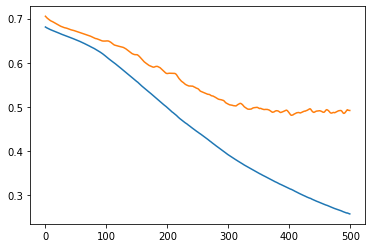

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

3888/3888 [==============================] - 7s 2ms/step


<AxesSubplot:>

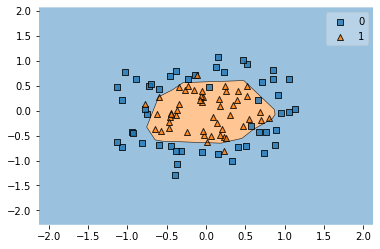

In [16]:
plot_decision_regions(df[[0,1]].values,df[2].values.astype(int),clf=model)

3888/3888 [==============================] - 6s 2ms/step


<AxesSubplot:>

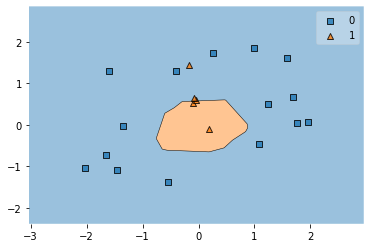

In [17]:
plot_decision_regions(X_test_trans,y_test.values.astype(int),clf=model)